In [36]:
!add-apt-repository --remove ppa:zeal-developers/ppa
!apt-get update 
!apt-get install zeal 

 Zeal (https://zealdocs.org/) is a simple documentation browser inspired by Dash. It allows searching offline copies of various programming reference documentation sets.
 More info: https://launchpad.net/~zeal-developers/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel removing it.

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:11 http://archive.ubuntu.

In [2]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   1189      0 --:--:-- --:--:-- --:--:--  1187
    100% |████████████████████████████████| 5.7MB 1.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 582.7MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61b34000 @  0x7f062b07a2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
Cloning into 'course-v3'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90

In [0]:
%matplotlib inline
from fastai import *

In [4]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libdrm-amdgpu1 libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libfftw3-double3 libflac8 libflite1
  libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common
  libgl1 libgl1-mesa-dri libglx-mesa0 libglx0 libgme0 libgsm1 libiec61883-0
  libjack-jackd2-0 libjbig0 libllvm6.0 libmp3lame0 libmpg123-0 libmysofa0
  libnuma1 libogg0 libopenal-data libopenal1 libopenjp2-7 libopenmpt0 libopus0
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpciaccess0
  libpixman-1-0 libpostproc54 libpu

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [151]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4864,  1.0000],
        [-0.5705,  1.0000],
        [ 0.5885,  1.0000],
        [ 0.3640,  1.0000],
        [-0.6718,  1.0000]])

In [7]:
x[:10]

tensor([[ 0.2578,  1.0000],
        [ 0.9685,  1.0000],
        [-0.9344,  1.0000],
        [-0.8615,  1.0000],
        [-0.9118,  1.0000],
        [-0.3901,  1.0000],
        [-0.9825,  1.0000],
        [-0.0722,  1.0000],
        [-0.1987,  1.0000],
        [-0.7957,  1.0000]])

In [152]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.ones(n).uniform_(-1.,1)

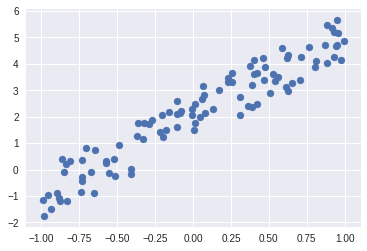

In [154]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [12]:
a

tensor([3., 2.])

In [0]:
a = tensor(-1.,1)

In [156]:
y_hat = x@a
mse(y_hat, y)

tensor(7.4969)

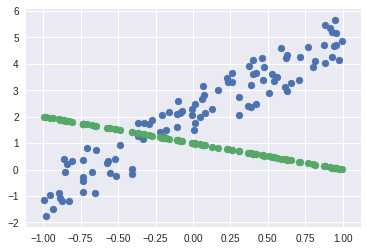

In [157]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [158]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() #calculates gradient
    with torch.no_grad():
        a.sub_(lr * a.grad) # parameter update step
        a.grad.zero_() 

In [160]:
lr = 1e-1
for t in range(100): update()

tensor(7.4969, grad_fn=<MeanBackward1>)
tensor(1.5883, grad_fn=<MeanBackward1>)
tensor(0.6014, grad_fn=<MeanBackward1>)
tensor(0.3788, grad_fn=<MeanBackward1>)
tensor(0.3278, grad_fn=<MeanBackward1>)
tensor(0.3160, grad_fn=<MeanBackward1>)
tensor(0.3133, grad_fn=<MeanBackward1>)
tensor(0.3127, grad_fn=<MeanBackward1>)
tensor(0.3126, grad_fn=<MeanBackward1>)
tensor(0.3125, grad_fn=<MeanBackward1>)


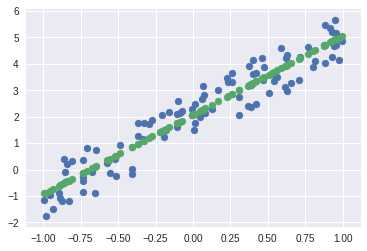

In [161]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3674889067840263376, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17466520439415184277
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1658831966354974801
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11149066240
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5378215464736174968
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

You may need to uncomment the following to install the necessary plugin the first time you run this:<br/>(after you run following commands, make sure to restart the kernal for this notebook)

In [33]:
# ! add-apt-repository -y ppa:mc3man/trusty-media  
# ! apt-get update -y 
# ! apt-get install -y ffmpeg  
# ! apt-get install -y frei0r-plugins 

 Upgraded, advanced or not normally available multimedia packages for Trusty
Xenial users go here - https://launchpad.net/~mc3man/+archive/ubuntu/xerus-media

*Please note that if using this ppa I would *not* try upgrading to 14.10/15.04, ect. Do a fresh install instead. The intent here is just for users wishing to stay on 14.04*

If upgrading releases anyway use ppa-purge *First* -
sudo ppa-purge  ppa:mc3man/trusty-media

Also note that using this ppa then disabling may cause issue for installing i386 packages like used by wine. So once enabled leave enabled or purge before removing.

Additionally if using apt-get * sudo  apt-get dist-upgrade will be needed* at times.(pay attention).  Otherwise package managers may be ok.

So typically to enable & first use -
sudo add-apt-repository ppa:mc3man/trusty-media
sudo apt-get update
sudo apt-get dist-upgrade

A few notes:
gstreamer0.10-ffmpeg - needed for some apps that still use gstreamer-0.10 & also provides h.264 in html5 decoding for fir

In [34]:
import matplotlib.animation as animation
print(animation.writers.list())

['html']


In [163]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=70)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

In [0]:
# def update(params: nn.Parameter, x:Tensor, y:Tensor, error_function, lr: float):
#     y_hat = x@params
#     loss = error_function(y, y_hat)
#     loss.backward()
#     with torch.no_grad():
#         # Edit in place to accomodate the case when params is BIG
#         params.sub_(lr * params.grad)
#         params.grad.zero_()
#     return (loss, params)

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward() #calculates gradient
    with torch.no_grad():
        a.sub_(lr * a.grad) # parameter update step
        a.grad.zero_() 

In [49]:
# lr = 5e-1
# for t in range(100): 
#     loss, params=update(a, x, y, mse, lr)
#     if(0==(t % 10)):  print(str(loss),str(params))
# print(a)

lr = 1e-1
for t in range(100): update()

tensor(0.1535)


RuntimeError: ignored

In [38]:
x = torch.ones(n,3)
x[:,1].uniform_(-2.,2)
x[:,0] = x[:,1]**2

x[:5]

tensor([[ 1.7186, -1.3110,  1.0000],
        [ 0.4272, -0.6536,  1.0000],
        [ 0.4295,  0.6554,  1.0000],
        [ 1.0460, -1.0228,  1.0000],
        [ 0.6958, -0.8341,  1.0000]])

In [0]:
a = tensor(20., -10., 10.)

In [0]:
y = x@a + torch.ones(n).uniform_(-1.,1.)*.7

y.detach().requires_grad = False

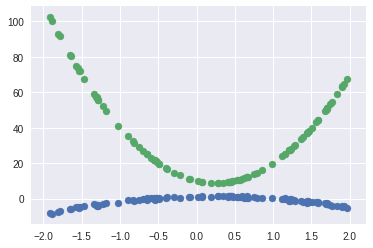

In [56]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@a)

In [50]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-2.,  1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
#     if t % 10 == 0: print(loss)
    loss.backward() #calculates gradient
    with torch.no_grad():
        a.sub_(lr * a.grad) # parameter update step
        a.grad.zero_() 

In [52]:
lr = 1e-1
for t in range(100): update()

tensor(0.1535, grad_fn=<MeanBackward1>)
tensor(0.1468, grad_fn=<MeanBackward1>)
tensor(0.1464, grad_fn=<MeanBackward1>)
tensor(0.1464, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)
tensor(0.1463, grad_fn=<MeanBackward1>)


In [77]:
lr = 3e-2
a = nn.Parameter(tensor(20., -10., 10.))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
scat = plt.scatter(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    new_values = tensor((x[:,0]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=70)

Creating polynomial function

In [0]:
n = 300
poly_size = 6

In [0]:
a = tensor(24., -10., 10., 4., 6., -10.)
# a = tensor(torch.rand(poly_size)/10.)

In [108]:
t = torch.ones(n,1).uniform_(-2,2)
t[:10]

tensor([[-0.8094],
        [-0.0331],
        [-0.0079],
        [ 1.7560],
        [-0.1283],
        [ 1.8120],
        [-0.4162],
        [ 0.7886],
        [-0.9587],
        [-1.0166]])

In [109]:

x = torch.ones(n,poly_size)

for i in range(1,poly_size):
  x[:,i] = t[:,0]**i
  
  
x[:5]

tensor([[ 1.0000e+00, -8.0943e-01,  6.5518e-01, -5.3032e-01,  4.2925e-01,
         -3.4745e-01],
        [ 1.0000e+00, -3.3106e-02,  1.0960e-03, -3.6285e-05,  1.2013e-06,
         -3.9770e-08],
        [ 1.0000e+00, -7.8602e-03,  6.1782e-05, -4.8562e-07,  3.8171e-09,
         -3.0003e-11],
        [ 1.0000e+00,  1.7560e+00,  3.0837e+00,  5.4150e+00,  9.5090e+00,
          1.6698e+01],
        [ 1.0000e+00, -1.2833e-01,  1.6469e-02, -2.1134e-03,  2.7122e-04,
         -3.4806e-05]])

In [0]:
y = x@a + torch.ones(n).uniform_(-4.,4.)*10

y.detach().requires_grad = False

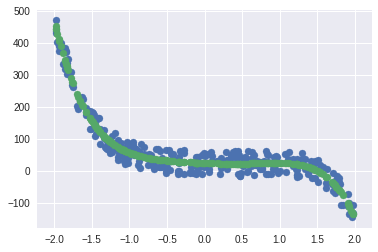

In [148]:
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],x@a)

In [149]:
# lr = 1e-3
# lr = 1e-2 # too high
# lr = 1e-5 # too slow
lr = 3e-3 # just right 

a = nn.Parameter(tensor(torch.rand(poly_size)/10.))

fig = plt.figure()
plt.scatter(x[:,1], y, c='orange')
scat = plt.scatter(x[:,1], x@a)
plt.close()

def animate(i):
    update()
    new_values = tensor((x[:,1]).numpy(),tensor((x@a)).detach().numpy()).numpy().T # Converts tu [N,2]
    scat.set_offsets(new_values)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=90)